In [1]:
#All the version from the libraries used are described in the ReadMe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

Data loading, cleaning, pre-processing for the dataset 2:

In [3]:
#Loading the 2 dataset from by E. Raff
df = pd.read_csv("Dataset 2.csv")

#Removing non essential columns according to the the 2.1.2 section
drop_cols = ["Unnamed: 0", "Year","Type","Primary Topic","Year Attempted",
             "Authors Reply", "Rigor vs Empirical", "Exact Compute Used",
             "Compute Needed"]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [4]:
#Data transformations. The data transformations were performed in Excel according to the the 2.1.2 section, 
#the values were replaced respectively to the instructions given in that section

#Renaming the columns for that the visuals and tables to look proper
df = df.rename(columns={
    'Author Code Available': 'Code availability',
    'Pages': 'Number of Pages',
    'Num References': 'Number of References',
    'Has Appendix': 'Inclusion of appendix',
    'Algo Difficulty': 'Used algorithm difficulty',
    'Pseudo Code': 'Algorithm written in pseudo code',
    'Data Available': 'Data availability',
    'Total Tables and Figures': 'Number of tables and figures',
    'Conceptualization Figures': 'Number of conceptualization figures',
    'Uses Exemplar Toy Problem': 'Example of the problem given',
    'Looks Intimidating': 'Paper intimidation outlook',
    'Hyperparameters Specified': 'Hyperparameter specification',
    
})

target = "Reproduced"

#Checking on the transformation results
print(df.head())

   Reproduced  Code availability  Number of Authors  Number of Pages  \
0           0                  1                  3               25   
1           0                  0                  2               14   
2           1                  0                  2                9   
3           0                  1                  3                8   
4           0                  1                  2                8   

   Number of References  Number of Equations  Number of Proofs  \
0                    32                   27                 0   
1                    18                   34                 1   
2                    17                   21                 0   
3                    17                   57                10   
4                    32                   34                 5   

   Inclusion of appendix  Paper intimidation outlook  Paper Readability  \
0                      1                           0                  1   
1                   

Exploratory data analysis for the dataset 2:

In [ ]:
#Column statistics table computation

#Adding all the columns to a python list of column names 
feature_cols = df.columns.tolist()

#For each column in the list calculating count for values and mean
for col in feature_cols:
    counts = df[col].value_counts()
    mean = df[col].mean()
    print(f"\nColumn: {col}")
    print(f"Counts:\n{counts}")
    print(f"Mean's: {mean:.2f}")

#For each column in the list calculating missing values
for col in feature_cols:
    missing = df[col].isna().sum()
    print("\n")
    print(f"{col}: {missing} missing values")

#Summary table with describe()
summary = df[feature_cols].describe().T
print("\nSummary table:")
print(summary)


Column: Reproduced
Counts:
Reproduced
1    162
0     93
Name: count, dtype: int64
Mean's: 0.64

Column: Code availability
Counts:
Code availability
1    136
0    119
Name: count, dtype: int64
Mean's: 0.53

Column: Number of Authors
Counts:
Number of Authors
2    84
3    64
1    40
4    35
5    19
7     6
6     5
8     2
Name: count, dtype: int64
Mean's: 2.84

Column: Number of Pages
Counts:
Number of Pages
8      40
9      38
7      18
10     18
11     14
6      13
12     11
13      8
22      7
27      7
16      6
17      5
29      5
14      5
4       5
24      5
31      4
37      4
15      4
19      3
35      3
25      3
32      3
34      2
5       2
26      2
2       2
38      2
30      2
21      2
28      1
18      1
107     1
20      1
33      1
70      1
50      1
63      1
44      1
39      1
23      1
43      1
Name: count, dtype: int64
Mean's: 15.02

Column: Number of References
Counts:
Number of References
16     12
17     11
20     11
18     10
12      9
25      9
14      8


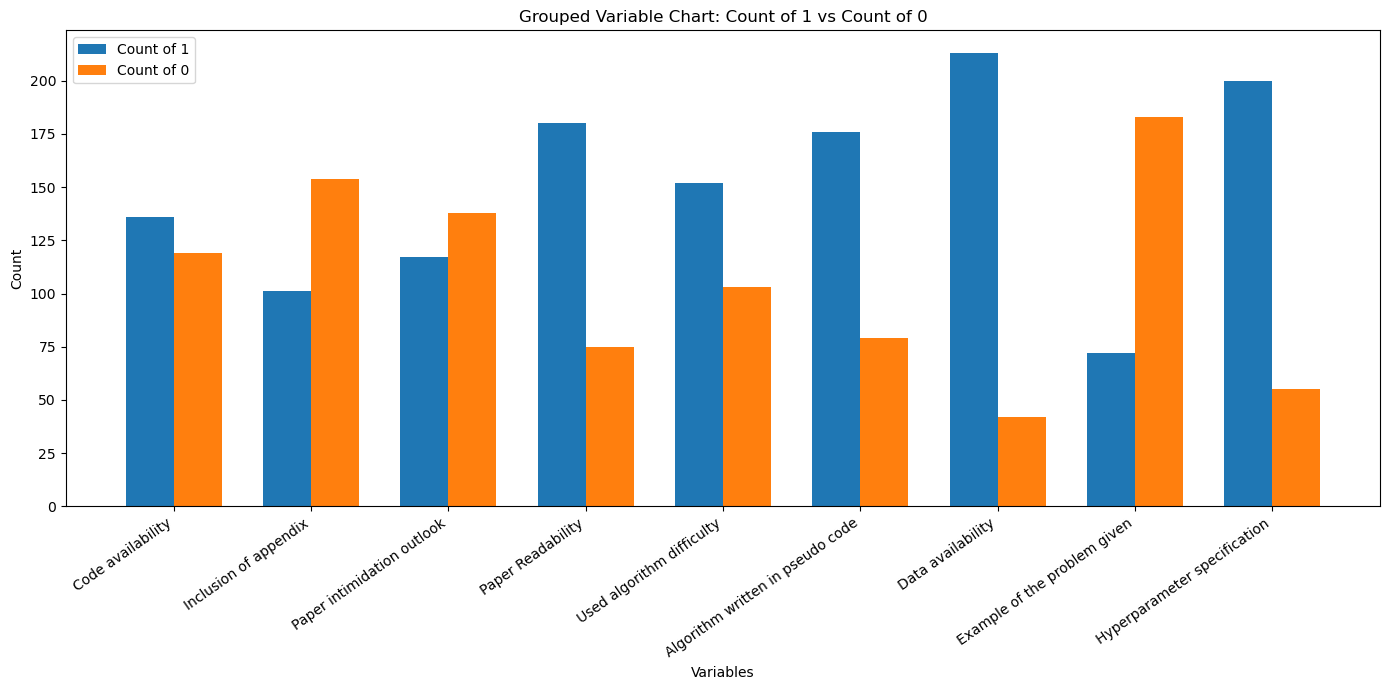

In [ ]:
#The counts of 1 and 0 values grouped by variable visual computation 

#Excluding target column and numerical columns so only independent binary variables are left
num_cols = [c for c in df.columns if c not in [ "Number of Authors", "Number of Other Figures", "Number of Graphs/Plots",
                                                  "Number of Tables", "Number of Proofs", "Number of Equations", "Number of References",
                                                  "Number of Pages", "Number of conceptualization figures", "Number of tables and figures"]]
feature_cols = [col for col in num_cols if col != target]

#Lists to store count of 1 and 0
count_1 = []
count_0 = []

#Looping through all variables
for col in feature_cols:
    count_1.append((df[col] == 1).sum()) #Summing for column variable
    count_0.append((df[col] == 0).sum())

#Converting the lists to numpy arrays for easier numerical operations
count_1 = np.array(count_1)
count_0 = np.array(count_0)

#Visual formatting
x = np.arange(len(feature_cols))
width = 0.35
plt.figure(figsize=(14, 7))
plt.bar(x - width/2, count_1, width, label="Count of 1")
plt.bar(x + width/2, count_0, width, label="Count of 0")
plt.xlabel("Variables")
plt.ylabel("Count")
plt.title("Grouped Variable Chart: Count of 1 vs Count of 0")
plt.xticks(x, feature_cols, rotation=35, ha="right")
plt.legend()
plt.tight_layout()

#Display visual
plt.show()

In [ ]:
#Shapiro-Wilk test for normality of numerical variables

#Selecting all numerical values from the dataset
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

#Looping through numerical columns
for col in num_cols:
    values = df[col].dropna() #NA values are not allowed for the computation
    stat, p = shapiro(values) #Shapiro-Wilk test for normality value
    print(f"\nColumn: {col}")
    print(f"Shapiro-Wilk p-value: {p:.4f}")
    if p < 0.05: #Logical test is p<0.05
        print("Non-normal distribution")
    else:
        print("Normally distributed")


Column: Reproduced
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Code availability
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Number of Authors
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Number of Pages
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Number of References
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Number of Equations
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Number of Proofs
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Inclusion of appendix
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Paper intimidation outlook
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Paper Readability
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Used algorithm difficulty
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: Algorithm written in pseudo code
Shapiro-Wilk p-value: 0.0000
Non-normal distribution

Column: 

In [ ]:
#VIF calculation for the dataset 2

X_const = sm.add_constant(df[feature_cols]) #A constant was needed for computation according to the statsmodels documentation

vif_data = pd.DataFrame() #Dataframe to store VIF results
vif_data["feature"] = X_const.columns #Storing column names
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])] #Regressing each variable against all others to get VIF

print(vif_data)

                            feature        VIF
0                             const  15.936151
1                 Code availability   1.136699
2             Inclusion of appendix   1.072219
3        Paper intimidation outlook   1.078638
4                 Paper Readability   1.143808
5         Used algorithm difficulty   1.235442
6  Algorithm written in pseudo code   1.119741
7                 Data availability   1.167137
8      Example of the problem given   1.114755
9      Hyperparameter specification   1.095055


Hypothesis testing for dataset 2:

In [ ]:
#Hypothesis testing with chi-square test of independence

#Excluding target column and numerical columns so only independent binary variables are left
feature_cols = [c for c in df.columns if c not in ["Reproduced", "Number of Authors", "Number of Other Figures", "Number of Graphs/Plots",
                                                  "Number of Tables", "Number of Proofs", "Number of Equations", "Number of References",
                                                  "Number of Pages", "Number of conceptualization figures", "Number of tables and figures"]]

results = [] #Storing results for each variable

#Looping through the binary variables and calculate the contingency table and chi-square test of independence
for col in feature_cols:
    table = pd.crosstab(df[col], df["Reproduced"])
    chi2, p, dof, expected = chi2_contingency(table)
    results.append({"Feature": col, "Chi2": chi2, "p-value": p})

#Converting results into a dataframe and sort by p-value
chi_df = pd.DataFrame(results).sort_values("p-value")
print(chi_df)

                            Feature       Chi2       p-value
3                 Paper Readability  89.573348  2.954780e-21
4         Used algorithm difficulty  18.142090  2.050192e-05
8      Hyperparameter specification  18.076089  2.122503e-05
5  Algorithm written in pseudo code   4.231820  3.967287e-02
0                 Code availability   1.768793  1.835315e-01
1             Inclusion of appendix   0.950296  3.296441e-01
6                 Data availability   0.585927  4.439984e-01
7      Example of the problem given   0.128679  7.198061e-01
2        Paper intimidation outlook   0.046892  8.285626e-01


In [ ]:
#Hypothesis testing with Mann-Whitney U test

#Excluding target column and binary columns so only independent numerical variables are left
num_cols = [c for c in df.columns if c in [ "Number of Authors", "Number of Proofs", "Number of Equations", "Number of References",
                                                  "Number of Pages", "Number of tables and figures"]]
#Identifying groups in each column
groups = df[target].dropna().unique()

#Labeling the groups for result repressentation
group1, group2 = groups
print(f"Comparing groups: {group1} vs {group2}\n")

#Looping through the numerical variables
for col in num_cols:
    values1 = df[df[target] == group1][col].dropna() #Values for each group with no NA values
    values2 = df[df[target] == group2][col].dropna()
    stat, p = mannwhitneyu(values1, values2, alternative='two-sided') #Mann-Whitney U test values
    print(f"Column: {col}")
    print(f"  Mann-Whitney U statistic: {stat:.4f}")
    print(f"  p-value: {p:.4f}")
    if p < 0.05: #Logical test is p<0.05
        print("Significant difference between groups")
    else:
        print("No significant difference between groups")

Comparing groups: 0 vs 1

Column: Number of Authors
  Mann-Whitney U statistic: 7907.0000
  p-value: 0.4972
No significant difference between groups
Column: Number of Pages
  Mann-Whitney U statistic: 7019.5000
  p-value: 0.3635
No significant difference between groups
Column: Number of References
  Mann-Whitney U statistic: 6928.0000
  p-value: 0.2861
No significant difference between groups
Column: Number of Equations
  Mann-Whitney U statistic: 8362.5000
  p-value: 0.1436
No significant difference between groups
Column: Number of Proofs
  Mann-Whitney U statistic: 8276.0000
  p-value: 0.1583
No significant difference between groups
Column: Number of tables and figures
  Mann-Whitney U statistic: 7395.5000
  p-value: 0.8089
No significant difference between groups


Logistic regression for dataset 2:

In [ ]:
#Normalization of numerical columns for logistic regression

#Numerical variables (however, binary columns are also numerical columns, so this technique was applied to find the non-binary numeric columns)
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

#Binary variables (columns that have only two unique values)
binary_cols = [c for c in numeric_cols if df[c].nunique() == 2]

#Finding the non-binary numeric columns by removing binary column list from numerical column list
num_to_scale = [c for c in numeric_cols if c not in binary_cols]

#Normalizing with MinMaxScaler for the non-binary numeric columns
scaler = MinMaxScaler()
df[num_to_scale] = scaler.fit_transform(df[num_to_scale])

In [15]:
#Logistic regression for dataset 2

#Independent variables
X = df[[ "Paper Readability", "Used algorithm difficulty", "Hyperparameter specification"]] #These were selected after the elimination of non significant variables by P>|z| value
#Dependent variable
Y = df['Reproduced']

X = sm.add_constant(X) #Constant
model = sm.Logit(Y, X).fit() #Other versions were tried: (penalty='l1'/'l2', maxiter=500/maxiter=100, method='lbfgs'/method='newton-cg')
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.441975
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Reproduced   No. Observations:                  255
Model:                          Logit   Df Residuals:                      251
Method:                           MLE   Df Model:                            3
Date:                Sat, 03 Jan 2026   Pseudo R-squ.:                  0.3263
Time:                        22:27:20   Log-Likelihood:                -112.70
converged:                       True   LL-Null:                       -167.30
Covariance Type:            nonrobust   LLR p-value:                 1.637e-23
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.6114      0.489     -3.294      0.001

Classification for dataset 2:

In [ ]:
#Train/test split

#Rewriting the feature_cols variable as transformations were done to it previously
feature_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
feature_cols = [col for col in feature_cols if col != target]

#Independent variables
X = df[feature_cols]
#Dependent varirable
Y = df["Reproduced"]
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42, stratify=Y) #Training/test split specification

In [ ]:
#Random Forest classification for dataset 2

#Random Forest classifier parameters
clf = RandomForestClassifier(
    n_estimators=100, #100 Trees
    random_state=42,
    class_weight='balanced' #'balanced' mode for classes for the data imbalance in the dataset
)
clf.fit(X_train, Y_train) #Training model on training set
Y_pred = clf.predict(X_test) #Predicting labels for test set
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred, zero_division=0))

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.88      0.91      0.89        32

    accuracy                           0.86        51
   macro avg       0.86      0.85      0.85        51
weighted avg       0.86      0.86      0.86        51



In [ ]:
#Calculating the negative (0 class) and positive (1 class) research papers in the train set for
#the scale_pos_weight parameter in XGBoost classifier
n_pos = Y_train.sum()
n_neg = len(Y_train) - n_pos

print(n_pos)
print(n_neg)

130
74


In [ ]:
#XGBoost classification for dataset 2

#XGBoost classifier parameters
clf = xgb.XGBClassifier(
    n_estimators=100, #100 Trees
    random_state=42,
    scale_pos_weight= 130/74 #'130/74' ratio between negative and positive mode for classes for the data imbalance in the dataset
)
clf.fit(X_train, Y_train) #Training model on training set
Y_pred = clf.predict(X_test) #Predicting labels for test set
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred, zero_division=0))

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.88      0.94      0.91        32

    accuracy                           0.88        51
   macro avg       0.88      0.86      0.87        51
weighted avg       0.88      0.88      0.88        51



In [ ]:
#Feature importance analysis for dataset 2

#Getting booster object from the trained model (used for accessing feature importance information)
booster = clf.get_booster()
importance_gain = booster.get_score(importance_type='gain') #Getting feature importance scores based on gain

#Converting to dataframe from the importance dictionary
feature_importance_gain = (
    pd.DataFrame.from_dict(importance_gain, orient='index', columns=['Importance'])
    .rename_axis('Variable')
    .reset_index()
    .sort_values(by='Importance', ascending=False)
)
#Normalizing importance scores
feature_importance_norm = feature_importance_gain.copy() #Copy to not change the original data 
feature_importance_norm['Importance_norm'] = feature_importance_norm['Importance'] / feature_importance_norm['Importance'].sum() #Normalize feature importance by importance/importance sum

#Displaying results
print(feature_importance_norm)

                               Variable  Importance  Importance_norm
8                     Paper Readability    5.185133         0.288975
11                    Data availability    1.128164         0.062874
16  Number of conceptualization figures    1.018119         0.056741
18         Hyperparameter specification    0.917047         0.051108
12         Number of tables and figures    0.866097         0.048269
17         Example of the problem given    0.838389         0.046725
0                     Code availability    0.788622         0.043951
1                     Number of Authors    0.788140         0.043924
15              Number of Other Figures    0.776333         0.043266
5                      Number of Proofs    0.762044         0.042470
6                 Inclusion of appendix    0.697567         0.038876
9             Used algorithm difficulty    0.681539         0.037983
3                  Number of References    0.659137         0.036735
4                   Number of Equa

In [ ]:
#Feature effects analysis for dataset 2

#Using a dataframe to store the change in predicted probabilities
feature_effects = pd.DataFrame(index=X_train.columns, columns=[f'Class_{i}' for i in sorted(Y.unique())], dtype=float)

#Looping through each variable
for feature in X_train.columns:
    X_temp = X_test.copy() #Copy to not change the original data
    X_temp[feature] = 0 #Setting variable to 0 for all samples
    prob_0 = clf.predict_proba(X_temp).mean(axis=0)
    X_temp[feature] = 1 #Setting variable to 1 for all samples
    prob_1 = clf.predict_proba(X_temp).mean(axis=0)
    feature_effects.loc[feature] = prob_1 - prob_0 #Effect of switching the variable from 0 to 1

#Displaying effects
print("\nChange in predicted class probabilities when variable is 1 vs 0:\n")
print(feature_effects.sort_values(by=feature_effects.columns[-1], ascending=False))


Change in predicted class probabilities when variable is 1 vs 0:

                                      Class_0   Class_1
Paper Readability                   -0.619859  0.619859
Hyperparameter specification        -0.106298  0.106298
Number of References                -0.082399  0.082399
Code availability                   -0.067315  0.067315
Number of Tables                    -0.050202  0.050201
Paper intimidation outlook          -0.040494  0.040494
Number of conceptualization figures -0.033430  0.033430
Number of Other Figures             -0.006058  0.006058
Example of the problem given         0.001130 -0.001130
Data availability                    0.001983 -0.001983
Number of Graphs/Plots               0.004695 -0.004695
Number of Equations                  0.013114 -0.013114
Number of Authors                    0.022421 -0.022421
Inclusion of appendix                0.029328 -0.029328
Number of Proofs                     0.038417 -0.038417
Number of Pages                      